In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt
import os
import time
import datetime
import pandas as pd
import numpy as np

# import daily data

In [18]:
os.listdir('./../data/')

['yearly_data',
 'raw_data',
 'monthly_data',
 '.DS_Store',
 'daily_data',
 'basic_info',
 'fund_style']

In [19]:
daily_data_dir = './../data/daily_data/'
basic_info_dir = './../data/basic_info/'
fund_style_dir = './../data/fund_style/'

In [20]:
fund_manager = pd.read_csv(os.path.join(basic_info_dir, 'fund_manager.csv'), encoding='utf-8')

In [21]:
# fund_manager = pd.read_csv(os.path.join(basic_info_dir, 'fund_manager.csv'), encoding='utf-8')

In [22]:
target_funds_info = pd.read_csv(os.path.join(basic_info_dir, 'target_funds_info.csv'), encoding='utf-8')

In [23]:
# fund_style = pd.read_excel(os.path.join(fund_style_dir+'daily', 'zz500g_daily.xls'), encoding='utf-8')
os.listdir(fund_style_dir+'daily/')
hs300 = pd.read_excel(os.path.join(fund_style_dir+'daily/', 'hs300_daily.xls'), encoding='utf-8')
hs300.head()

,证券代码,证券名称,交易时间,开盘价,最高价,最低价,收盘价,涨跌,涨跌幅%,成交量,成交额
0,000300,沪深300,2005-01-04,994.77,994.77,980.66,982.794,——,——,7412868.0,4.431977e+09
1,000300,沪深300,2005-01-05,981.58,997.32,979.88,992.564,9.77002,0.994107,7119108.0,4.529208e+09
2,000300,沪深300,2005-01-06,993.33,993.79,980.33,983.174,-9.39002,-0.946036,6288029.0,3.921015e+09
3,000300,沪深300,2005-01-07,983.05,995.71,979.81,983.958,0.783997,0.0797414,7298694.0,4.737469e+09
4,000300,沪深300,2005-01-10,983.76,993.96,979.79,993.879,9.92102,1.00828,5791697.0,3.762933e+09


In [24]:
os.listdir(fund_style_dir+"monthly/")
monthly_data = pd.read_csv(os.path.join(fund_style_dir+'monthly/','fund_style_monthly.csv'), encoding='utf-8')
monthly_data.columns

Index([u'date', u'hs300g_monthly_close', u'hs300g_monthly_return',
       u'bond_long_monthly_close', u'bond_long_monthly_return',
       u'bond_medium_monthly_close', u'bond_medium_monthly_return',
       u'bond_short_monthly_close', u'bond_short_monthly_return',
       u'hs300v_monthly_close', u'hs300v_monthly_return',
       u'zz1000_monthly_close', u'zz1000_monthly_return',
       u'zz500g_monthly_close', u'zz500g_monthly_return',
       u'zz500v_monthly_close', u'zz500v_monthly_return'],
      dtype='object')

In [25]:
# data = monthly_data[['date','bond_medium_monthly_close', 'bond_short_monthly_close', 'bond_long_monthly_close']]

# plt.plot(pd.to_datetime(data['date']), data[['bond_medium_monthly_close', 'bond_short_monthly_close', 'bond_long_monthly_close']])

In [26]:
hs300.columns = ['code', 'name', 'date', 'hs300_daily_open', 'max', 'min',
                 'hs300_daily_close', 'hs300_daily_rate', 'hs300_daily_return', 'turnover','volume']
# hs300.head()

In [27]:
hs300 = hs300[['date','hs300_daily_close', 'hs300_daily_return']]
hs300['hs300_daily_return'] =  (hs300['hs300_daily_return']).convert_objects(convert_numeric=True)/100.0

/home/tnbaby/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


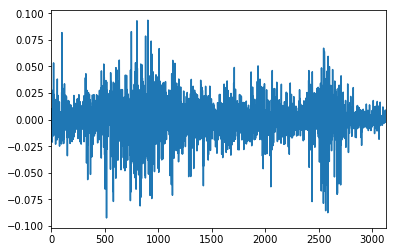

In [28]:
hs300['hs300_daily_return'].plot()

In [29]:
os.listdir(daily_data_dir)

['daily_data_ready.zip',
 'daily_data_clean_20171110.zip',
 'daily_before_adjust_data_funds.csv',
 'funds_daily.csv',
 'funds_daily.zip',
 'daily_after_adjust_data_funds.csv',
 '.ipynb_checkpoints',
 'daily_data_ready.csv',
 'daily_fund_style_index_data.csv',
 'daily_no_adjust_data_funds.csv']

# import daily funds data

In [30]:
daily_funds = pd.read_csv(os.path.join(daily_data_dir, 'daily_data_ready.csv'), encoding='utf-8')

In [31]:
# daily_funds[daily_funds['date'] > '20050101']

In [32]:
# daily_fund_style = pd.read_csv(os.path.join(fund_style_dir, 'daily/fund_style_daily.csv'), encoding='utf-8')
# # daily_fund_style['hs300v_daily_close'].plot()
# # daily_fund_style = pd.merge(daily_fund_style, hs300, how='left', on=['date'])
# # daily_fund_style
# daily_fund_style.head()

In [33]:
# daily_fund_style[['bond_long_daily_close', 'bond_medium_daily_close', 'bond_short_daily_close']].plot()
# data = daily_fund_style[['bond_long_daily_close', 'bond_medium_daily_close', 'bond_short_daily_close']].values
# plt.plot(pd.to_datetime(daily_fund_style['date']), daily_fund_style[['bond_long_daily_close', 'bond_medium_daily_close', 'bond_short_daily_close']])

In [34]:
tmp = pd.to_datetime(daily_funds['date'])
daily_funds.loc[:,'year'] = tmp.dt.year
daily_funds.loc[:,'month'] = tmp.dt.month
daily_funds.loc[:,'date'] = tmp.dt.date
daily_funds.loc[:, 'day'] = tmp.dt.day
daily_funds = daily_funds[daily_funds['year'] > 2005]
# daily_funds.columns

In [35]:
# tmp = pd.to_datetime(hs300['date'])
# hs300.loc[:,'year'] = tmp.dt.year
# hs300.loc[:,'month'] = tmp.dt.month
# hs300.loc[:,'date'] = tmp.dt.date
# hs300.loc[:, 'day'] = tmp.dt.day

In [36]:
# tmp = pd.to_datetime(daily_fund_style['date'])
# daily_fund_style.loc[:,'year'] = tmp.dt.year
# daily_fund_style.loc[:,'month'] = tmp.dt.month
# daily_fund_style.loc[:,'date'] = tmp.dt.date
# daily_fund_style.loc[:, 'day'] = tmp.dt.day
# daily_fund_style = pd.merge(daily_fund_style, hs300, how='left', on=['date','year', 'month','day'])
# daily_data
# daily_fund_style.head()

In [37]:
# daily_data = pd.merge(daily_funds, daily_fund_style, how='left', on=['date','year', 'month','day'])
# daily_data
# daily_funds.head()

In [39]:
for columns_i in list(daily_funds.columns):
    if columns_i in ['year','month','day']:
        continue
    print '{} : {}'.format(columns_i, daily_funds[~daily_funds[columns_i].isnull()].groupby(['year','month','day']).first().index.min())

code : (2006, 1, 4)
date : (2006, 1, 4)
net_unit_value : (2006, 1, 4)
net_unit_return : (2006, 1, 4)
net_cumulative_value : (2006, 1, 4)
net_cumulative_return : (2006, 1, 4)
net_restore_value : (2006, 1, 4)
net_restore_return : (2006, 1, 4)
hs300g_daily_return : (2006, 1, 4)
bond_long_daily_return : (2006, 1, 4)
bond_medium_daily_return : (2006, 1, 4)
bond_short_daily_return : (2006, 1, 4)
hs300v_daily_return : (2006, 1, 4)
zz1000_daily_return : (2006, 1, 4)
zz500g_daily_return : (2006, 1, 4)
zz500v_daily_return : (2006, 1, 4)
hs300_daily_return : (2006, 1, 4)


In [40]:
daily_data = daily_data[daily_data['year'] > 2005]
daily_data.reset_index(drop=True, inplace=True)

NameError: name 'daily_data' is not defined

In [ ]:
daily_data.columns

In [ ]:
del daily_data['year']
del daily_data['month']
del daily_data['day']

In [ ]:
daily_data.dropna(how="any").head()

In [ ]:
daily_data.to_csv('./../data/daily_data/daily_data_clean_'+ datetime.date.today().strftime('%Y%m%d') + '.csv'
                  , encoding='utf-8', index=False, header=True)

In [ ]:
plt.plot(daily_data['hs300_daily_return'])

In [ ]:
# daily_funds = pd.read_csv(os.path.join(daily_data_dir, 'funds_daily.csv'), encoding='utf-8')

# daily_funds.head()

# daily_funds.sort_values(["日期".decode('utf-8')], ascending=[True], inplace=True)

# daily_funds.columns

# daily_funds_return = daily_funds[["日期".decode('utf-8'), "代码".decode('utf-8'), "涨跌幅(%)".decode('utf-8')]]

# daily_funds_return.columns = ['date', 'code', 'return']

# daily_funds_return.head()

# tmp = pd.to_datetime(daily_funds_return['date'])
# daily_funds_return.loc[:,'year'] = tmp.dt.year
# daily_funds_return.loc[:,'month'] = tmp.dt.month
# daily_funds_return.loc[:,'date'] = tmp.dt.date
# daily_funds_return.loc[:, 'day'] = tmp.dt.day

# daily_funds_return = daily_funds_return[['date', 'year', 'month', 'day', 'code', 'return']]

# daily_funds_return.head()

# daily_funds_return.columns

# daily_funds_return = daily_funds_return[~daily_funds_return['return'].isnull()]
# daily_funds_return.reset_index(drop=True, inplace=True)
# daily_funds_return.head()

# # import daily fundstyle data from daily data

# daily_fund_style_data = pd.read_csv(os.path.join(daily_data_dir, 'daily_fund_style_index_data.csv'), encoding='utf-8')

# daily_fund_style_data.shape

# daily_fund_style_data.head()

# daily_fund_style_data.dtypes

# daily_fund_style_data.columns

# daily_fund_style_data = daily_fund_style_data[['日期'.decode('utf-8'), '中证100指数'.decode('utf-8'),
#                                                 '中债综合指数'.decode('utf-8'),'中债总指数'.decode('utf-8'),
#                                                '中证500指数'.decode('utf-8'),'中债中短期债券指数'.decode('utf-8'),
#                                                '中债长期债券指数'.decode('utf-8'), '中债短融AA指数'.decode('utf-8'),
#                                               '沪深300'.decode('utf-8')]]

# daily_fund_style_data.shape

# daily_fund_style_data.columns = ['date', 'zhongzheng_100', 'zhongzhai_composite', 'zhongzhai_total', 
#                                  'zhongzheng_500','zhongzhai_short_term','zhongzhai_long_term',
#                                  'zhongzhai_short_AA', 'sh300']

# daily_fund_style_data.head()

# daily_fund_style_data['date'] = pd.to_datetime(daily_fund_style_data['date'])
# daily_fund_style_data['year'] = daily_fund_style_data['date'].dt.year
# daily_fund_style_data['month'] = daily_fund_style_data['date'].dt.month
# daily_fund_style_data['day'] = daily_fund_style_data['date'].dt.day
# daily_fund_style_data['date'] = daily_fund_style_data['date'].dt.date

# daily_fund_style_data = daily_fund_style_data[['date', 'year', 'month', 'day','zhongzheng_100', 'zhongzhai_composite',
#                                 'zhongzhai_total', 'zhongzheng_500', 'zhongzhai_short_term','zhongzhai_long_term',
#                                 'zhongzhai_short_AA', 'sh300']]

# daily_fund_style_data = daily_fund_style_data[~daily_fund_style_data['zhongzheng_500'].isnull()]

# daily_fund_style_data.sort_values(['date'], ascending=[True], inplace=True)
# daily_fund_style_data.reset_index(drop=True, inplace=True)

# daily_fund_style_data.head()

# daily_fund_style_data_month_end = daily_fund_style_data.sort_values('day',
#                                         ascending=[False]).groupby(['year','month'], as_index=False).first()

# daily_fund_style_data_month_end.head()

# # merge daily_funds_data with daily_fund style index return data

# daily_funds_return.columns

# daily_fund_style_data.columns

# #daily_funds_return = daily_funds_return[daily_funds_return['year'] >= 2006]

# daily_fund_style_data.head()

# ## calculate daily returns for these fund style index

# daily_fund_style_data_columns = list(daily_fund_style_data.columns)

# daily_fund_style_data_columns

# daily_fund_style_return_data_columns = []
# for column_i in daily_fund_style_data_columns[4:]:
#     daily_fund_style_data[column_i + '_shift'] = daily_fund_style_data[column_i].shift(1)
#     daily_fund_style_data[column_i + '_return'] = daily_fund_style_data[column_i] / daily_fund_style_data[column_i + '_shift'] - 1
#     daily_fund_style_return_data_columns.append(column_i + '_return')
# daily_fund_style_data.head()

# daily_fund_style_return_data_columns.insert(0, 'day')
# daily_fund_style_return_data_columns.insert(0, 'month')
# daily_fund_style_return_data_columns.insert(0, 'year')
# daily_fund_style_return_data_columns.insert(0, 'date')

# daily_fund_style_return_data_columns

# daily_fund_style_return_data = daily_fund_style_data[daily_fund_style_return_data_columns]

# daily_fund_style_return_data.head()

# daily_fund_style_return_data = daily_fund_style_return_data[~daily_fund_style_return_data['zhongzheng_100_return'].isnull()]

# daily_fund_style_return_data['zhongzhai_short_AA_return'].plot()

# daily_funds_return.sort_values(['year','month'], ascending=[True, True], inplace=True)

# daily_funds_return['return'] = daily_funds_return['return'] / 100

# ## find the nearest year-month-day of all funds

# daily_data = pd.merge(daily_funds_return, daily_fund_style_return_data, how='left', on=['date','year', 'month','day'])

# for columns_i in list(daily_data.columns):
#     if columns_i in ['year','month','day']:
#         continue
#     print '{} : {}'.format(columns_i, daily_data[~daily_data[columns_i].isnull()].groupby(['year','month','day']).first().index.min())

# daily_data = daily_data[daily_data['year'] >= 2007]    

# #daily_data

# # save the data into files

# daily_data.sort_values(['code', 'year','month','day'], ascending=[True,True, True,True], inplace=True)
# daily_data.reset_index(drop=True, inplace=True)
# print daily_data.shape

# daily_data.head()

# daily_data= daily_data[['code','date','year','month','day','return','sh300_return','zhongzheng_100_return','zhongzhai_composite_return',
#                        'zhongzhai_total_return','zhongzheng_500_return','zhongzhai_short_term_return','zhongzhai_long_term_return', 'zhongzhai_short_AA_return']]

# daily_data.dropna(how='any').head()

# daily_data.to_csv('./../data/daily_data/daily_data_clean_'+ datetime.date.today().strftime('%Y%m%d') + '.csv', encoding='utf-8', index=False, header=True)

# daily_data['sh300_return'].plot()

